In [102]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [103]:
# Laden dataset
df = pd.read_csv('../../data/raw/export_insurance_portfolio_data_forecasting_2000_2025.csv')

In [104]:
# Laat de eerste paar rijen van de dataset zien
df.head()

,Jaar_Maand,Product,Label_Naam,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,...,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
0,200001,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200002,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200003,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,200004,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,200005,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
# Bekijk de statistieken van de dataset
df.describe()

,Jaar_Maand,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,Geroyeerde_Jaarpremie,Prolongaties,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
count,3387.000000,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3.387000e+03,3387.000000,3.387000e+03,3.387000e+03,3387.000000,3387.000000,3387.000000,3387.000000,3387.000000
mean,201844.194272,8830.269560,4.393535e+06,8874.757898,4.427187e+06,174.675229,9.230146e+04,108.630351,5.737173e+04,583.332448,2.875051e+05,2.964894e+05,310.985533,1.642907e+05,1.636598e+05,581.386599,582.724305,8984.295843,514.394707,532.779232
std,515.806873,15158.567392,7.008598e+06,15175.168543,7.033158e+06,435.781811,2.063735e+05,397.447403,1.875675e+05,998.387080,4.626515e+05,4.781926e+05,1273.184986,7.466712e+05,7.456852e+05,178.115680,177.849471,28945.323321,245.513206,260.012484
min,200001.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-95466.690000,0.000000,0.000000
25%,201602.000000,884.000000,5.890981e+05,957.000000,6.212164e+05,16.000000,1.084856e+04,2.000000,9.811250e+02,25.000000,1.438223e+04,1.470320e+04,27.000000,1.833024e+04,1.824310e+04,466.394480,467.044041,0.000000,428.245811,435.681161
50%,201909.000000,2964.000000,1.805004e+06,3008.000000,1.817904e+06,57.000000,3.351302e+04,30.000000,1.830424e+04,205.000000,1.155399e+05,1.193990e+05,83.000000,5.004794e+04,5.049404e+04,549.706030,551.269252,935.330000,523.160263,537.616369
75%,202211.000000,8642.000000,4.437527e+06,8679.000000,4.457773e+06,155.000000,8.757904e+04,85.000000,4.614188e+04,608.500000,3.168872e+05,3.234964e+05,223.000000,1.254480e+05,1.254900e+05,654.648526,656.813596,8337.950000,623.250998,651.052212
max,202512.000000,73031.000000,3.931488e+07,73031.000000,3.955505e+07,7263.000000,3.282298e+06,8831.000000,3.915997e+06,6543.000000,3.515939e+06,3.856362e+06,59937.000000,3.538899e+07,3.539776e+07,1620.440000,1230.762600,340422.340000,1620.440000,1596.510000


Hieronder volgt een gedetailleerde analyse per feature (NewBusiness, Royementen en Prolongaties) op basis van de statistische data en de trends in de dataset.

1. NewBusiness (Nieuwe productie)
Gemiddelde en Volume: Met een gemiddelde van ca. 175 nieuwe polissen per maand per label/product combinatie, is er een constante instroom. Echter, de mediaan ligt op slechts 57, wat betekent dat in de meeste maanden de instroom bescheiden is, maar dat er uitschieters zijn die het gemiddelde fors omhoog trekken.

Volatiliteit: De standaardafwijking (435) is meer dan twee keer zo groot als het gemiddelde. Dit duidt op een zeer grillig patroon. Dit kan veroorzaakt worden door seizoensinvloeden (bijv. pieken bij de kentekenwissels in januari) of door specifieke marketingcampagnes en de overname van portefeuilles.

Uitschieters: De maximale waarde van 7.263 suggereert een eenmalige gebeurtenis (zoals een migratie van een grote groep polissen naar een nieuw label).

Dominante Labels: De labels "Geen Label" (gem. 793) en "BOVAG Polis" (gem. 500) zijn de grootste drijvers van nieuwe business.

2. Royementen (Uitstroom)
Retentie-indicator: Het gemiddelde aantal royementen is 109 per maand. Dit ligt aanzienlijk lager dan de NewBusiness (175). Dit is een positief signaal: de portefeuille groeit organisch omdat er meer mensen bijkomen dan dat er vertrekken.

Stabiliteit: De spreiding bij royementen is ook hoog, maar de "basis" (mediaan van 30) is lager dan bij nieuwe business. Dit suggereert dat de uitstroom relatief gecontroleerd is, behalve in specifieke maanden waarin mogelijk opschoningen van de portefeuille plaatsvinden.

Verhouding: Voor elke 1,6 nieuwe polissen wordt er gemiddeld 1 opgezegd. Dit is een gezonde ratio voor een groeiende verzekeringsportefeuille.

3. Prolongaties (Verlengingen)
De "Motor" van de portefeuille: Dit is met afstand de grootste categorie (gemiddeld 583 per maand). Prolongaties vertegenwoordigen de bestaande klanten die hun verzekering voortzetten.

Portefeuille-omvang: Het hoge aantal prolongaties in vergelijking met NewBusiness laat zien dat dit een volwassen portefeuille is waarbij de nadruk ligt op behoud. Bij de grotere labels zoals "BOVAG Polis" zien we zelfs uitschieters naar meer dan 2.200 prolongaties per maand.

Voorspelbaarheid: Hoewel ook hier variatie in zit, is dit de meest stabiele factor voor de inkomstenstroom. De hogere waarden hier bevestigen dat het klantenbestand loyaal is of dat polissen automatisch worden verlengd.

Samenvattende Conclusie
Groei: De dataset toont een groeiende trend waarbij NewBusiness > Royementen.

Samenhang: Er is een duidelijke correlatie tussen de labels. Labels met veel prolongaties (zoals BOVAG en Toyota) hebben logischerwijs ook een hogere absolute uitstroom (Royementen), simpelweg omdat de vijver waaruit geroyeerd kan worden groter is.

Productfocus: Alle data heeft betrekking op Auto Particulier, verdeeld over diverse dealervestigingen en labels. De variatie tussen deze labels is groot; waar sommige labels (zoals Van Mossel) zeer actief zijn in nieuwe business, zijn andere labels (zoals Lexus of Suzuki) stabieler met een focus op prolongaties.

In [106]:
# Bekijk de datatypes en het aantal niet-nul waarden
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Jaar_Maand                              3387 non-null   int64  
 1   Product                                 3359 non-null   str    
 2   Label_Naam                              3359 non-null   str    
 3   Beginstand                              3387 non-null   int64  
 4   Jaarpremie_Beginstand                   3387 non-null   float64
 5   Eindstand                               3387 non-null   int64  
 6   Jaarpremie_Eindstand                    3387 non-null   float64
 7   NewBusiness                             3387 non-null   int64  
 8   Jaarpremie_NewBusiness                  3387 non-null   float64
 9   Royementen                              3387 non-null   int64  
 10  Geroyeerde_Jaarpremie                   3387 non-null   float64
 11  Pr

In [107]:
# Filteren op rijen waar zowel Product als Label_Naam NULL (NaN) zijn
null_rows = df[df['Product'].isna() & df['Label_Naam'].isna()]
print(null_rows)

    Jaar_Maand Product Label_Naam  Beginstand  Jaarpremie_Beginstand  \
0       200001     NaN        NaN           0                    0.0   
1       200002     NaN        NaN           0                    0.0   
2       200003     NaN        NaN           0                    0.0   
3       200004     NaN        NaN           0                    0.0   
4       200005     NaN        NaN           0                    0.0   
5       200006     NaN        NaN           0                    0.0   
6       200007     NaN        NaN           0                    0.0   
7       200008     NaN        NaN           0                    0.0   
8       200009     NaN        NaN           0                    0.0   
9       200010     NaN        NaN           0                    0.0   
10      200011     NaN        NaN           0                    0.0   
11      200012     NaN        NaN           0                    0.0   
12      200101     NaN        NaN           0                   

In [108]:
# Verwijder rijen waar BEIDE kolommen (Product EN Label_Naam) NaN zijn
# 'how="all"' zorgt ervoor dat de rij alleen wordt verwijderd als beide velden leeg zijn.
df_cleaned = df.dropna(subset=['Product', 'Label_Naam'], how='all')

In [109]:
# Laat de datatypes zien van de eerste paar rijen van de opgeschoonde dataset.
df_cleaned.info()

<class 'pandas.DataFrame'>
RangeIndex: 3359 entries, 28 to 3386
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Jaar_Maand                              3359 non-null   int64  
 1   Product                                 3359 non-null   str    
 2   Label_Naam                              3359 non-null   str    
 3   Beginstand                              3359 non-null   int64  
 4   Jaarpremie_Beginstand                   3359 non-null   float64
 5   Eindstand                               3359 non-null   int64  
 6   Jaarpremie_Eindstand                    3359 non-null   float64
 7   NewBusiness                             3359 non-null   int64  
 8   Jaarpremie_NewBusiness                  3359 non-null   float64
 9   Royementen                              3359 non-null   int64  
 10  Geroyeerde_Jaarpremie                   3359 non-null   float64
 11  P

In [110]:
# Laat de eerste paar rijen van de opgeschoonde dataset zien
df_cleaned.head()

,Jaar_Maand,Product,Label_Naam,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,...,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
28,201507,Auto Particulier,BCS Polis,50,29585.43,106,59337.54,56,28886.31,0,...,0.0,0.0,38,20242.19,21107.99,591.708600,559.788113,0.0,0.0,0.0
29,201508,Auto Particulier,BCS Polis,106,59337.54,168,91685.32,65,32911.85,1,...,0.0,0.0,46,21866.59,22007.44,559.788113,545.745952,0.0,0.0,0.0
30,201509,Auto Particulier,BCS Polis,168,91685.32,216,111434.76,54,23342.33,6,...,0.0,0.0,26,12065.70,13365.58,545.745952,515.901666,0.0,0.0,0.0
31,201510,Auto Particulier,BCS Polis,216,111434.76,265,133615.83,57,26433.61,6,...,0.0,0.0,45,23305.39,23313.57,515.901666,504.210679,0.0,0.0,0.0
32,201511,Auto Particulier,BCS Polis,265,133615.83,309,157925.46,49,26034.01,5,...,0.0,0.0,27,14114.42,14585.22,504.210679,511.085631,0.0,0.0,0.0


In [111]:
# Bekijk de statistieken van de opgeschoonde dataset
df_cleaned.describe()

,Jaar_Maand,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,Geroyeerde_Jaarpremie,Prolongaties,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
count,3359.000000,3359.000000,3.359000e+03,3359.000000,3.359000e+03,3359.000000,3.359000e+03,3359.000000,3.359000e+03,3359.000000,3.359000e+03,3.359000e+03,3359.000000,3.359000e+03,3.359000e+03,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000
mean,201858.922298,8903.877047,4.430158e+06,8948.736231,4.464091e+06,176.131289,9.307087e+04,109.535874,5.784997e+04,588.194999,2.899017e+05,2.989609e+05,313.577851,1.656602e+05,1.650240e+05,586.232930,587.581787,9059.187264,518.682606,537.220380
std,491.923490,15200.084541,7.026217e+06,15216.560761,7.050743e+06,437.301661,2.070592e+05,398.976661,1.882744e+05,1001.112982,4.638277e+05,4.794119e+05,1278.164016,7.496264e+05,7.486372e+05,170.727282,170.408805,29054.073282,241.980617,256.483194
min,200205.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-95466.690000,0.000000,0.000000
25%,201603.000000,967.500000,6.407122e+05,1000.000000,6.528575e+05,16.000000,1.132924e+04,2.000000,1.102465e+03,33.000000,1.947612e+04,1.981021e+04,28.000000,1.934254e+04,1.928118e+04,468.847975,469.279999,0.000000,432.097848,437.143710
50%,201909.000000,3018.000000,1.821564e+06,3048.000000,1.841239e+06,59.000000,3.386861e+04,30.000000,1.861390e+04,209.000000,1.165033e+05,1.208723e+05,86.000000,5.049940e+04,5.128122e+04,551.321426,552.242456,982.230000,524.793945,539.741607
75%,202212.000000,8700.000000,4.457773e+06,8746.500000,4.476919e+06,157.000000,8.816943e+04,86.000000,4.634481e+04,613.500000,3.179283e+05,3.250702e+05,226.000000,1.271890e+05,1.274914e+05,655.573579,657.581902,8447.990000,625.388389,653.324632
max,202512.000000,73031.000000,3.931488e+07,73031.000000,3.955505e+07,7263.000000,3.282298e+06,8831.000000,3.915997e+06,6543.000000,3.515939e+06,3.856362e+06,59937.000000,3.538899e+07,3.539776e+07,1620.440000,1230.762600,340422.340000,1620.440000,1596.510000


Analyse per Feature (Gereinigd)
1. NewBusiness (Nieuwe productie)
Stijging in gemiddelde: Door het verwijderen van de lege rijen is het gemiddelde gestegen naar 176 per maand.

Hoge instroom-pieken: De kloof tussen de mediaan (59) en het maximum (7.263) blijft enorm. Dit wijst erop dat de groei van de portefeuille niet lineair verloopt, maar waarschijnlijk in "golven" komt (bijvoorbeeld door seizoensgebonden acties of bulk-overnames van polissen door specifieke labels).

Ondergrens: Zelfs in de actieve dataset zijn er maanden met 0 nieuwe business voor bepaalde labels, wat duidt op labels die mogelijk gestopt zijn of zeer specifiek/tijdelijk van aard zijn.

2. Royementen (Uitstroom)
Stabiele uitstroom: Het gemiddelde van 110 royementen per maand staat tegenover een instroom van 176. Dit bevestigt een positieve netto groei van gemiddeld 66 polissen per label per maand.

Voorspelbaarheid: Het 75%-kwartiel ligt op 86, wat betekent dat in driekwart van de gevallen de uitstroom onder de 100 polissen per maand blijft. De uitschieter van 8.831 is zeer uitzonderlijk en wijst waarschijnlijk op een eenmalige sanering of een label-migratie.

3. Prolongaties (Verlengingen)
Volume: Dit is de meest actieve feature met een gemiddelde van 588 en een mediaan van 209. De stijging van het 25%-kwartiel (van 25 naar 33) laat zien dat de "echte" actieve portefeuille per label groter is dan de ruwe data eerst deed vermoeden.

Gezondheid van de portefeuille: Het feit dat de prolongaties zo hoog zijn ten opzichte van de royementen (factor 5,4) is een sterke indicator voor een gezonde retentie. Klanten blijven gemiddeld langdurig in de boeken staan.

Conclusie van de opschoning
De data is nu representatiever voor de actieve bedrijfsvoering. De verhoudingen tussen de drie features laten een klassiek beeld zien van een volwassen verzekeringsportefeuille: een grote, stabiele basis van prolongaties, een gezonde instroom van nieuwe business en een relatief lage, gecontroleerde uitstroom (royementen).

In [112]:
# Datum omzetten (formaat 200001 naar datetime) en voeg date kolom toe, belangrijk voor tijdreeksanalyse
df_cleaned['date'] = pd.to_datetime(df_cleaned['Jaar_Maand'].astype(str), format='%Y%m')
df_cleaned = df_cleaned.sort_values('date')

In [113]:
# Controleren of de datum correct is toegevoegd
df_cleaned.head()

,Jaar_Maand,Product,Label_Naam,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,...,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie,date
1017,200205,Auto Particulier,Geen Label,1,201.0,1,201.0,0,0.0,0,...,0.0,0,0.0,0.0,201.0,201.0,0.0,0.0,0.0,2002-05-01
1018,200206,Auto Particulier,Geen Label,1,201.0,1,201.0,0,0.0,0,...,0.0,0,0.0,0.0,201.0,201.0,0.0,0.0,0.0,2002-06-01
1019,200207,Auto Particulier,Geen Label,1,201.0,1,201.0,0,0.0,0,...,0.0,0,0.0,0.0,201.0,201.0,0.0,0.0,0.0,2002-07-01
1020,200208,Auto Particulier,Geen Label,1,201.0,1,201.0,0,0.0,0,...,0.0,0,0.0,0.0,201.0,201.0,0.0,0.0,0.0,2002-08-01
1021,200209,Auto Particulier,Geen Label,1,201.0,1,201.0,0,0.0,0,...,0.0,0,0.0,0.0,201.0,201.0,0.0,0.0,0.0,2002-09-01


Visualiseren van distributies...


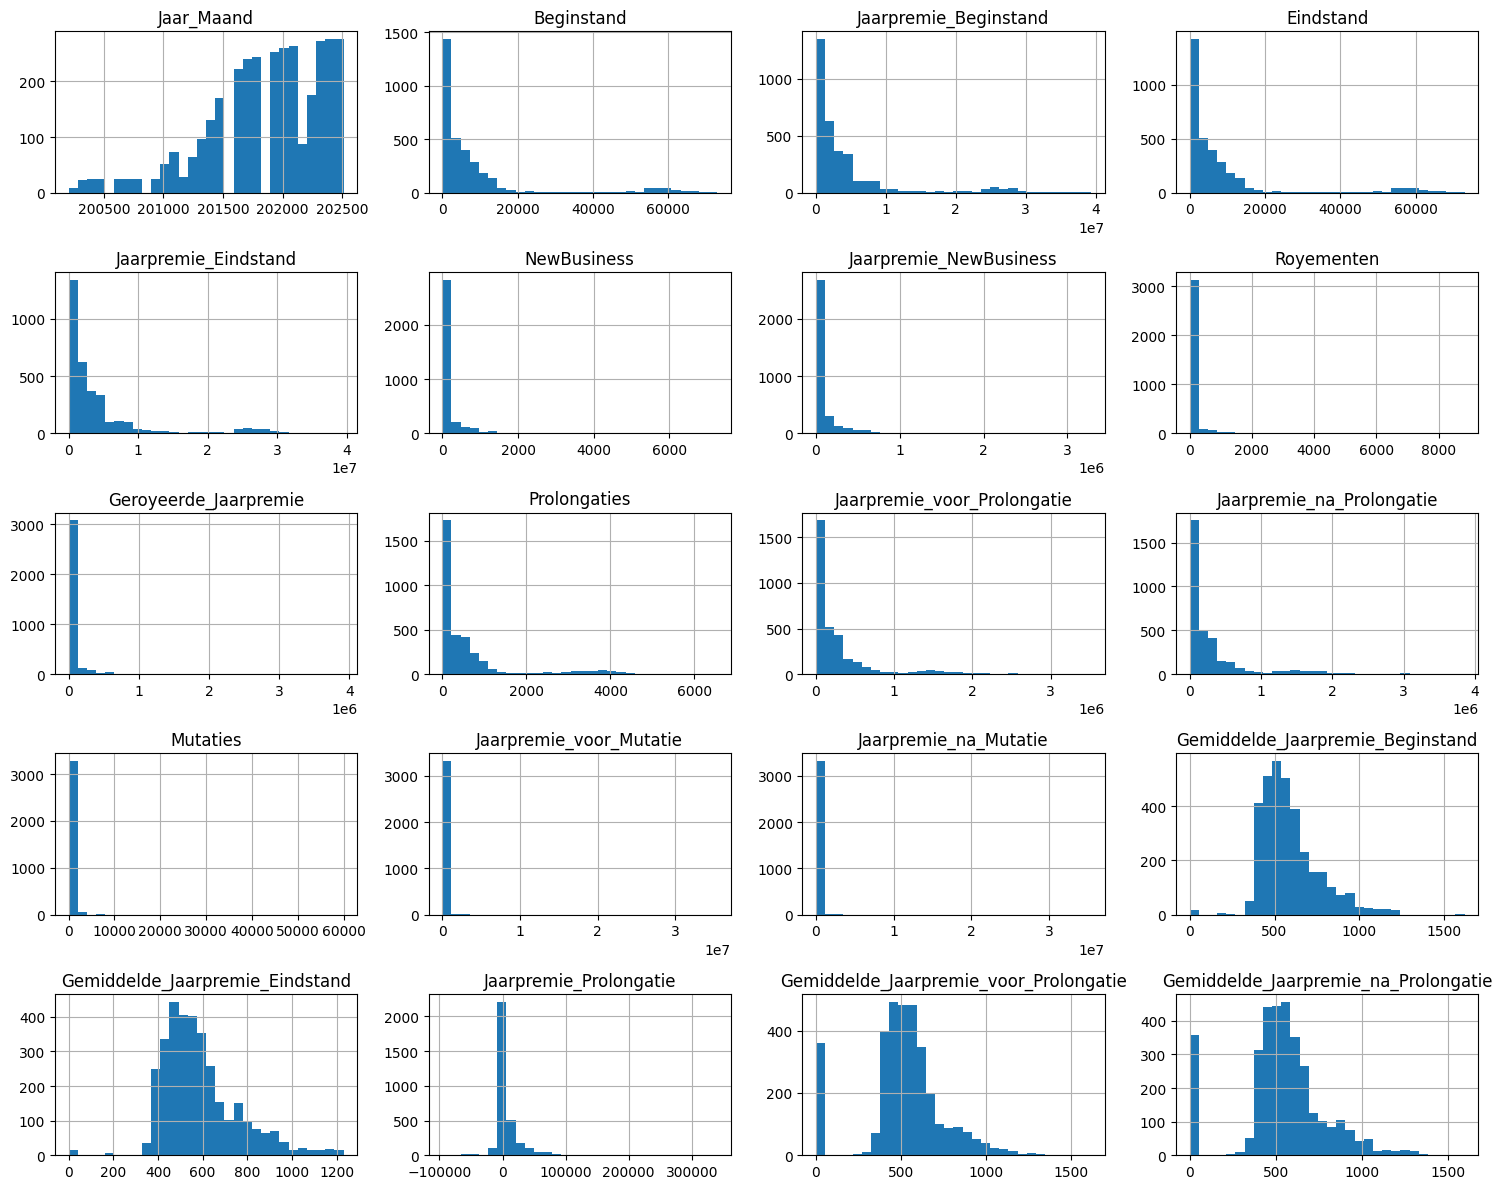

In [114]:
# Distributie van alle numerieke features
print("Visualiseren van distributies...")

df_cleaned.select_dtypes(include=[np.number]).hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

Visualiseren van distributies van de targets en berekenen van skewness en kurtosis.


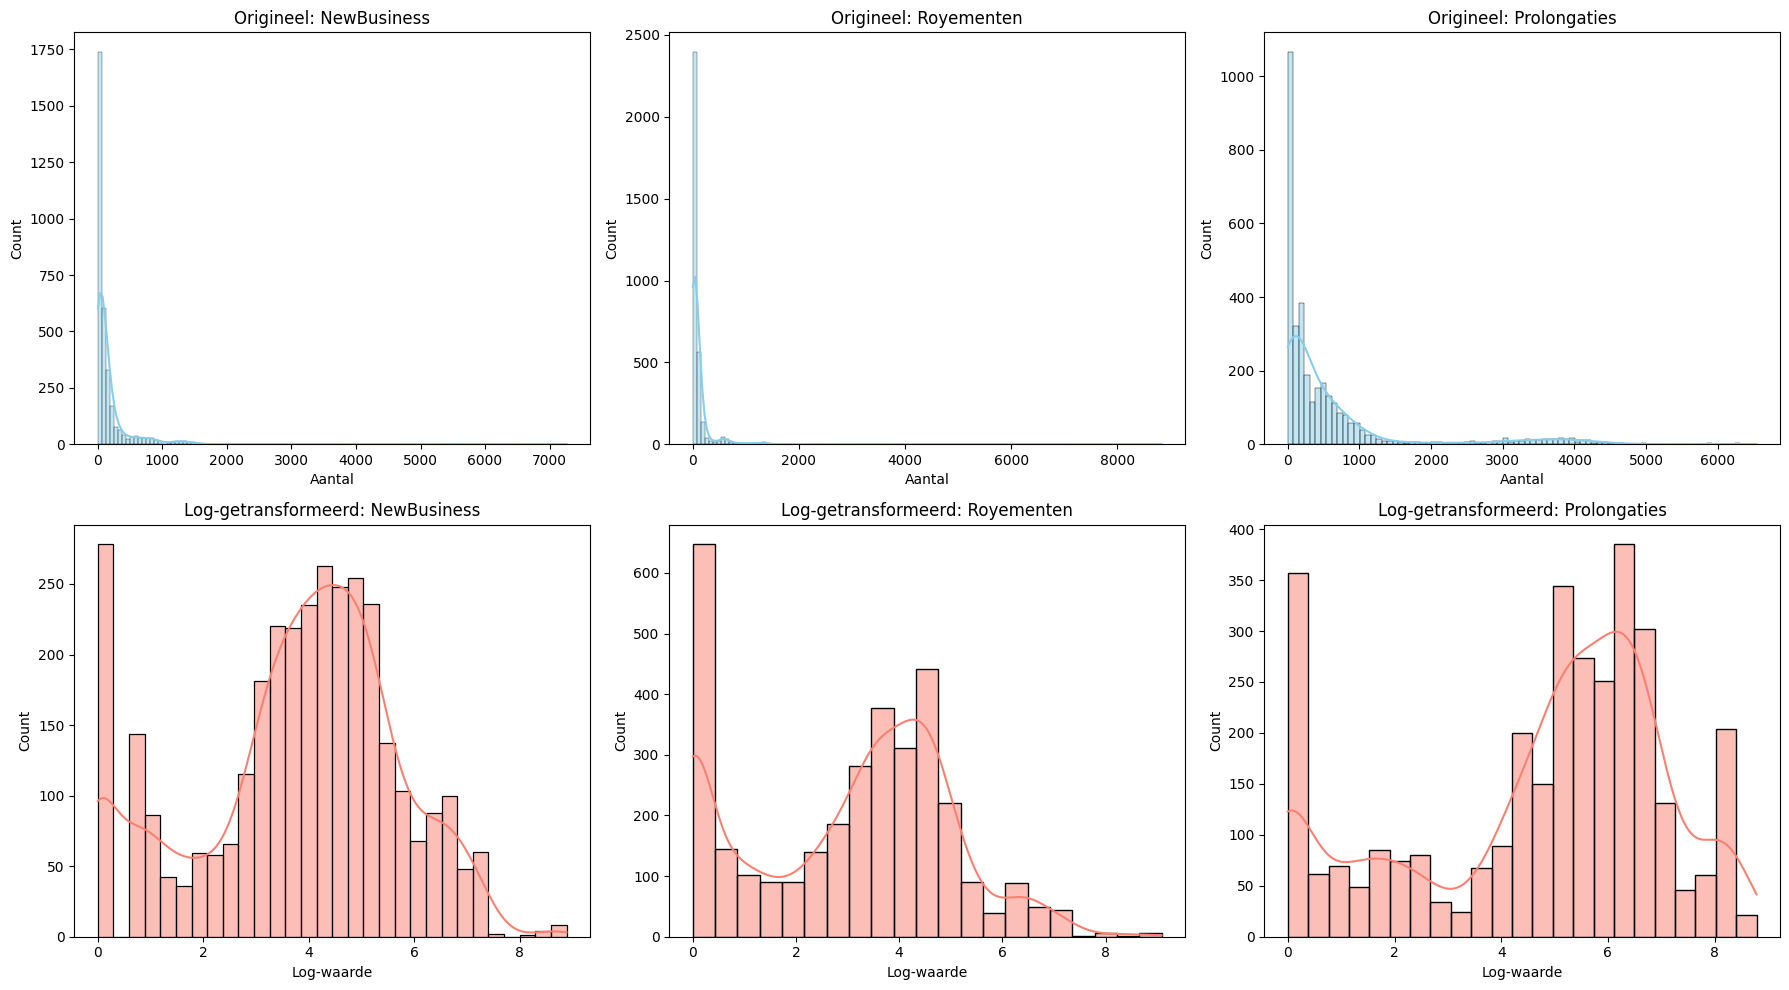

Statistische Tabel:
              Skewness (Orig)  Kurtosis (Orig)  Skewness (Log)  Kurtosis (Log)
NewBusiness          8.965658       112.042155       -0.433404       -0.373414
Royementen          13.127078       227.134752       -0.132090       -0.850651
Prolongaties         2.683098         6.841423       -0.703835       -0.547921


In [115]:
# Distributie van de targets (Royementen, NewBusiness, Prolongaties) en hun statistieken (skewness, kurtosis)
print("Visualiseren van distributies van de targets en berekenen van skewness en kurtosis.")

# Targets definiëren
targets = ['NewBusiness', 'Royementen', 'Prolongaties']

# Bereken statistieken voor originele data
stats_orig = pd.DataFrame({
    'Skewness (Orig)': df_cleaned[targets].skew(),
    'Kurtosis (Orig)': df_cleaned[targets].kurtosis()
})

# Log-transformatie toepassen (log1p = log(x+1) om 0-waarden te kunnen verwerken)
df_log = np.log1p(df_cleaned[targets])
df_log.columns = [f'Log_{col}' for col in targets]

# Bereken statistieken voor getransformeerde data
stats_log = pd.DataFrame({
    'Skewness (Log)': df_log.skew(),
    'Kurtosis (Log)': df_log.kurtosis()
})

# Visualisatie: Vergelijking voor en na transformatie
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(targets):
    # Bovenste rij: Originele distributies
    sns.histplot(df_cleaned[col], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Origineel: {col}')
    axes[0, i].set_xlabel('Aantal')
    
    # Onderste rij: Getransformeerde distributies
    sns.histplot(df_log[f'Log_{col}'], kde=True, ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Log-getransformeerd: {col}')
    axes[1, i].set_xlabel('Log-waarde')

plt.tight_layout()
plt.show()

# Combineer resultaten in een tabel
final_stats = pd.concat([stats_orig, stats_log.set_index(stats_orig.index)], axis=1)
print("Statistische Tabel:")
print(final_stats)

Analyse van de resultaten
De analyse richt zich op de geschiktheid van de data voor een SARIMA-model.

1. Voor de transformatie (Blauwe grafieken)
Extreem "Right-Skewed": De originele data vertoont een klassieke "L-vorm". De overgrote meerderheid van de waarden is laag, met een zeer dunne maar extreem lange staart naar rechts.

Hoge Kurtosis: Vooral bij Royementen (227) en NewBusiness (112) is de kurtosis extreem hoog. Dit betekent dat uitschieters niet alleen incidenteel zijn, maar de hele verdeling domineren.

Probleem voor SARIMA: Een SARIMA-model probeert fouten te minimaliseren die normaliter rond het gemiddelde liggen. Bij deze ruwe data zal het model de uitschieters proberen te "fitten", wat leidt tot zeer onbetrouwbare voorspellingen voor de normale maanden.

2. Na de Log-transformatie (Rode grafieken)
Normalisering: De log-transformatie heeft de "staart" ingetrokken en de data bij de nul-lijn uit elkaar getrokken.

Skewness richting nul: De scheefheid is drastisch gedaald. Voor alle drie de variabelen ligt de nieuwe skewness tussen de -1 en 1, wat als een "vrijwel normale verdeling" wordt beschouwd. Dit is ideaal voor lineaire tijdreeksmodellen.

Kurtosis reductie: De kurtosis is nu zelfs licht negatief (tussen -0,3 en -0,9), wat betekent dat de verdeling iets platter is dan een perfecte normale verdeling, maar zonder de gevaarlijke extreme pieken van de originele data.

Conclusie voor het model
Door de log-transformatie te gebruiken, heb je de variantie gestabiliseerd. Dit is een cruciale voorwaarde voor SARIMA.

Advies: Train je SARIMA-model op de Log-getransformeerde data. Bij het presenteren van de resultaten voer je de inverse bewerking uit (np.expm1()) om de voorspelde waarden weer terug te rekenen naar de oorspronkelijke aantallen polissen. Dit zorgt voor een wiskundig zuiver model met resultaten die voor de business begrijpelijk blijven.

Visualiseren van boxplots voor originele en getransformeerde data.
Aantal uitschieters (Original) per feature:
{'NewBusiness': 386, 'Royementen': 279, 'Prolongaties': 322}


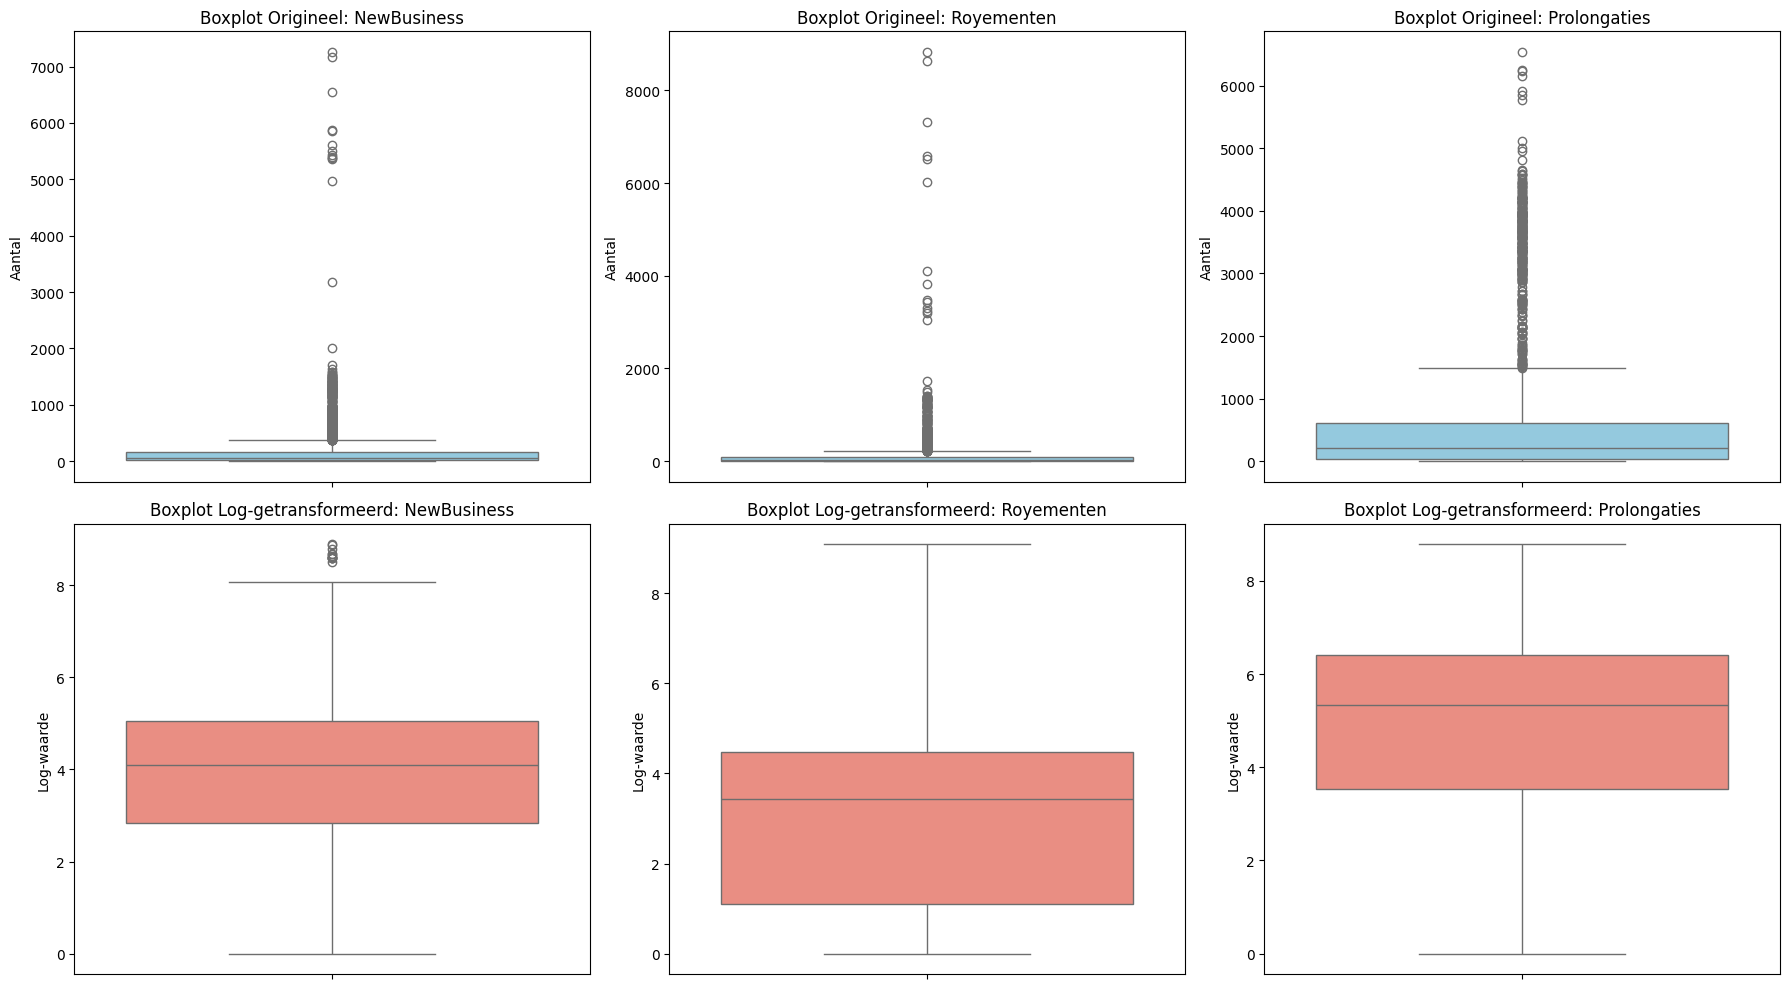

In [116]:
# Boxplots van de targets voor en na transformatie
print("Visualiseren van boxplots voor originele en getransformeerde data.")

# Visualisatie: Boxplots vergelijking
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(targets):
    # Originele boxplots
    sns.boxplot(y=df_cleaned[col], ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Boxplot Origineel: {col}')
    axes[0, i].set_ylabel('Aantal')
    
    # Log-getransformeerde boxplots
    sns.boxplot(y=df_log[f'Log_{col}'], ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Boxplot Log-getransformeerd: {col}')
    axes[1, i].set_ylabel('Log-waarde')

plt.tight_layout()
#plt.savefig('boxplot_comparison.png')

# Statistieken over outliers (IQR methode) voor de tekstuele analyse
outlier_summary = {}
for col in targets:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_cleaned[(df_cleaned[col] < (Q1 - 1.5 * IQR)) | (df_cleaned[col] > (Q3 + 1.5 * IQR))]
    outlier_summary[col] = len(outliers)

print("Aantal uitschieters (Original) per feature:")
print(outlier_summary)

Analyse van de gemaakte boxplots
Aantal uitschieters: In de originele data vallen honderden datapunten buiten het normale bereik (386 bij NewBusiness, 279 bij Royementen en 322 bij Prolongaties).

Resultaat na Log-transformatie: De onderste rij boxplots toont een veel gezonder beeld. De "staart" aan uitschieters is drastisch ingekort. Dit betekent dat als je een SARIMA-model traint, het model niet langer "gehypnotiseerd" wordt door een paar gigantische pieken, maar ook de subtiele trends in de normale maanden kan leren.

Conclusie: De boxplots bevestigen dat een transformatie noodzakelijk is. Zonder deze stap zou je tijdreeksmodel waarschijnlijk zeer onnauwkeurige voorspellingen doen voor "normale" maanden, omdat het teveel gewicht toekent aan de extreme uitschieters.

In [117]:
# Voeg de getransformeerde kolommen toe met een loop
for col in targets:
    # We maken een nieuwe kolomnaam aan met het voorvoegsel 'Log_'
    df_cleaned[f'Log_{col}'] = np.log1p(df_cleaned[col])

# Optioneel: Controleer het resultaat
print(df_cleaned[[ 'NewBusiness', 'Log_NewBusiness', 'Royementen', 'Log_Royementen', 'Prolongaties', 'Log_Prolongaties']])

      NewBusiness  Log_NewBusiness  Royementen  Log_Royementen  Prolongaties  \
1017            0         0.000000           0        0.000000             0   
1018            0         0.000000           0        0.000000             0   
1019            0         0.000000           0        0.000000             0   
1020            0         0.000000           0        0.000000             0   
1021            0         0.000000           0        0.000000             0   
...           ...              ...         ...             ...           ...   
2786          148         5.003946         183        5.214936           769   
3130            2         1.098612         105        4.663439           417   
2818           71         4.276666          18        2.944439           102   
573             0         0.000000          27        3.332205           121   
3386          194         5.273000         216        5.379897           892   

      Log_Prolongaties  
1017          

EDA per target (Royementen, NewBusiness, Prolongaties)

--- Analyse voor: Log_Royementen ---


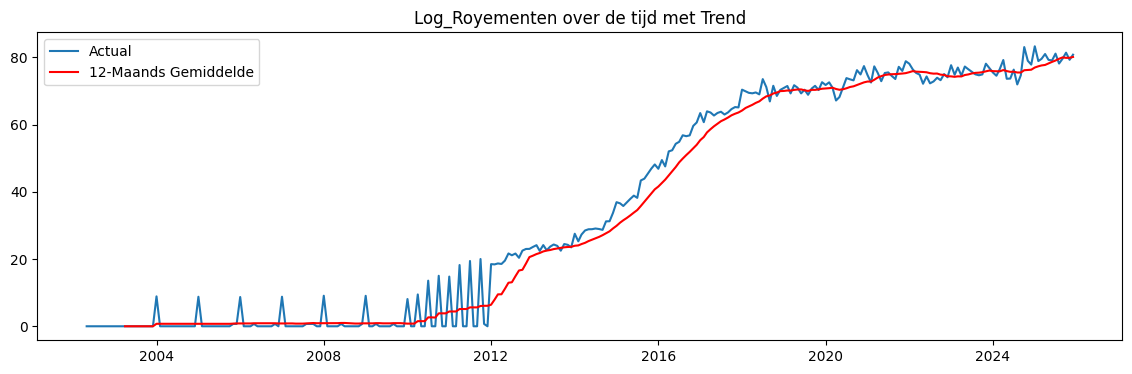

ADF Statistic: -0.477
p-waarde: 0.896
Status: Niet stationair (Je moet 'differencing' toepassen)


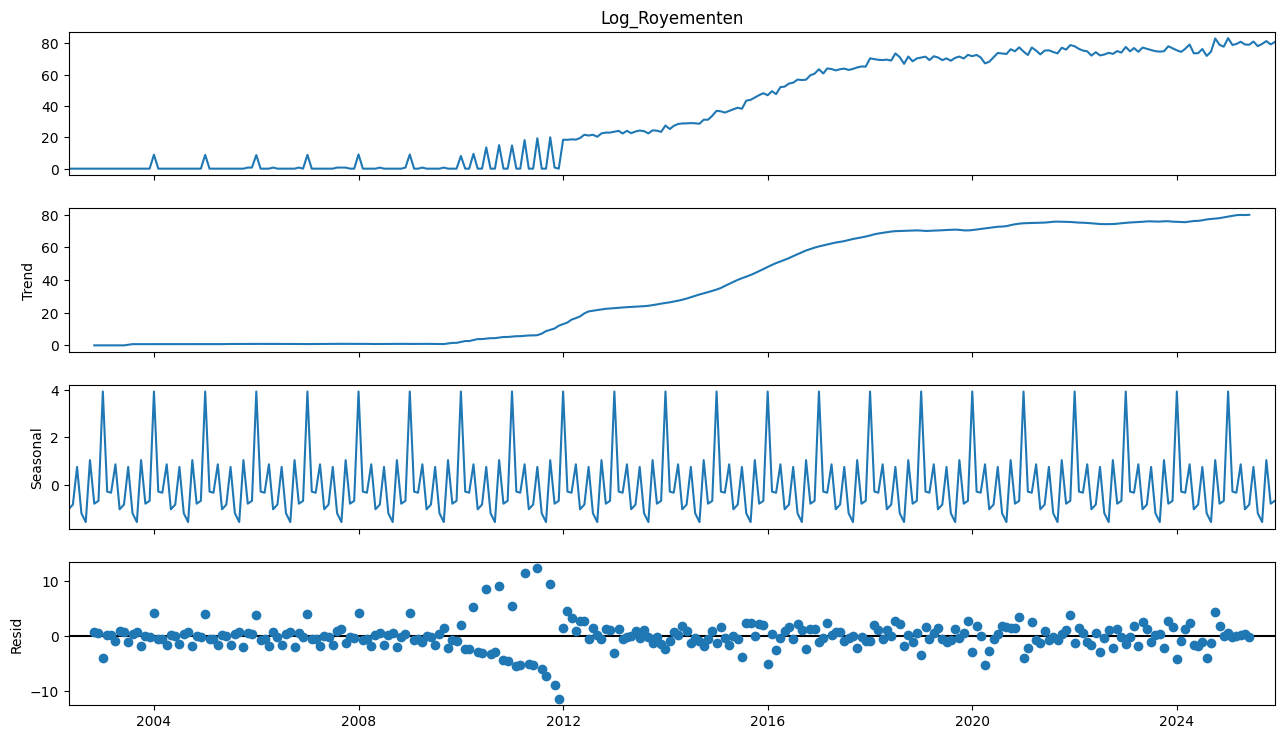

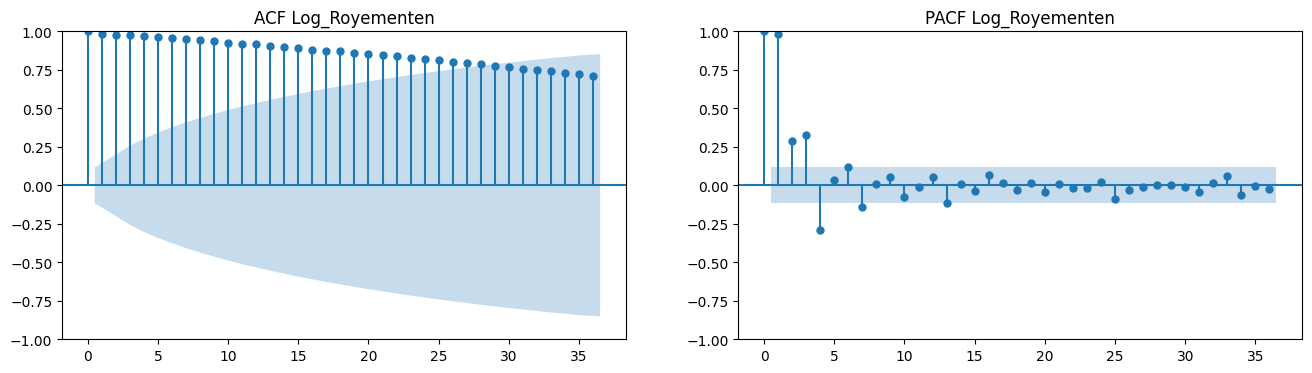


--- Analyse voor: Log_NewBusiness ---


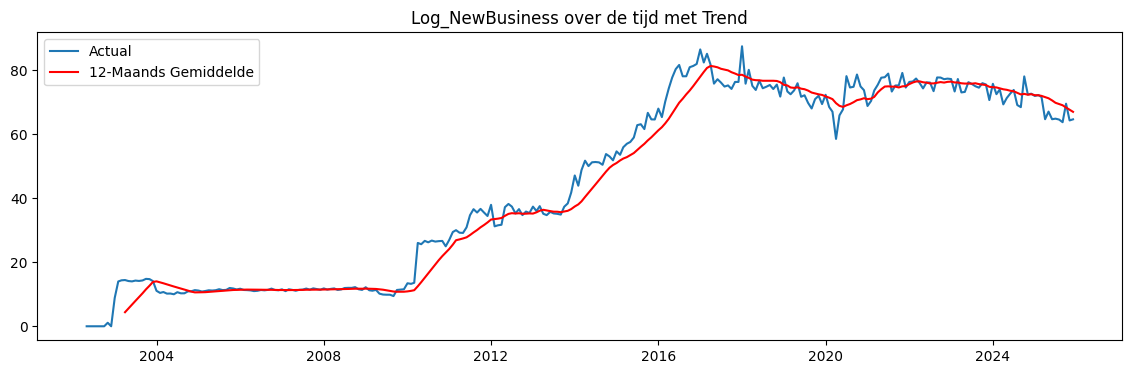

ADF Statistic: -0.965
p-waarde: 0.766
Status: Niet stationair (Je moet 'differencing' toepassen)


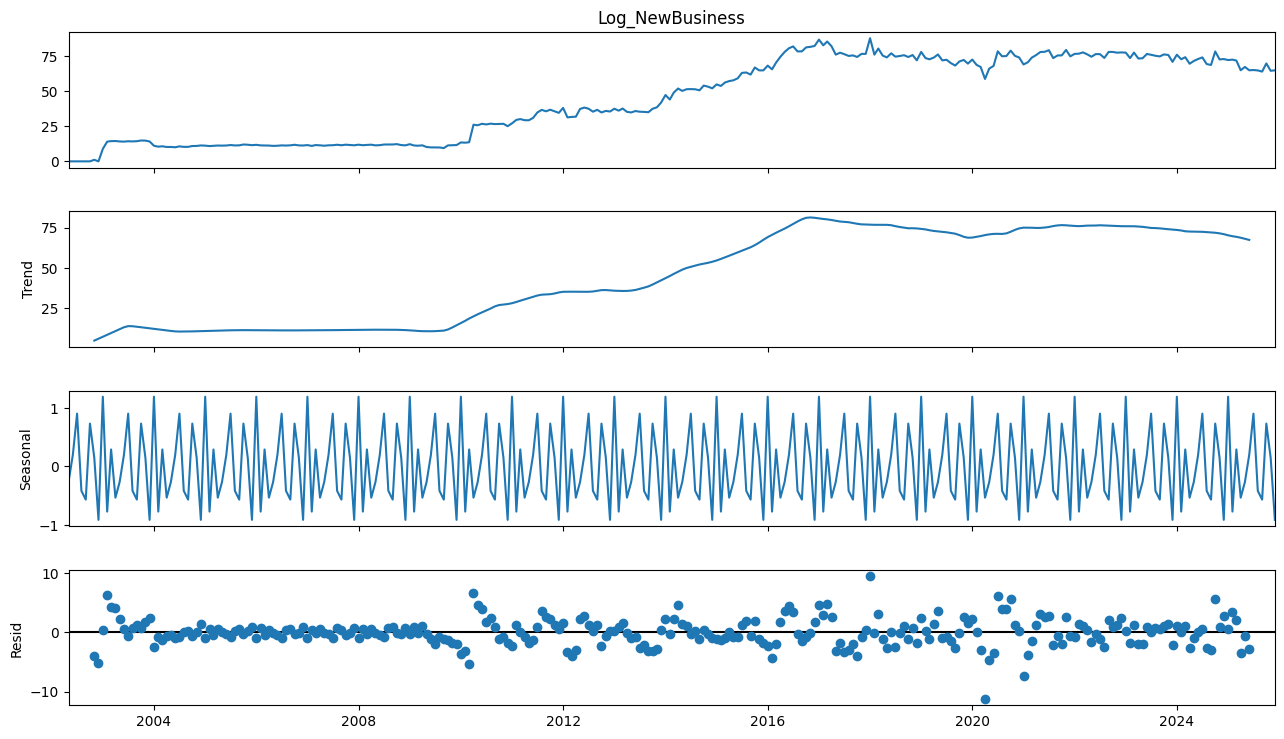

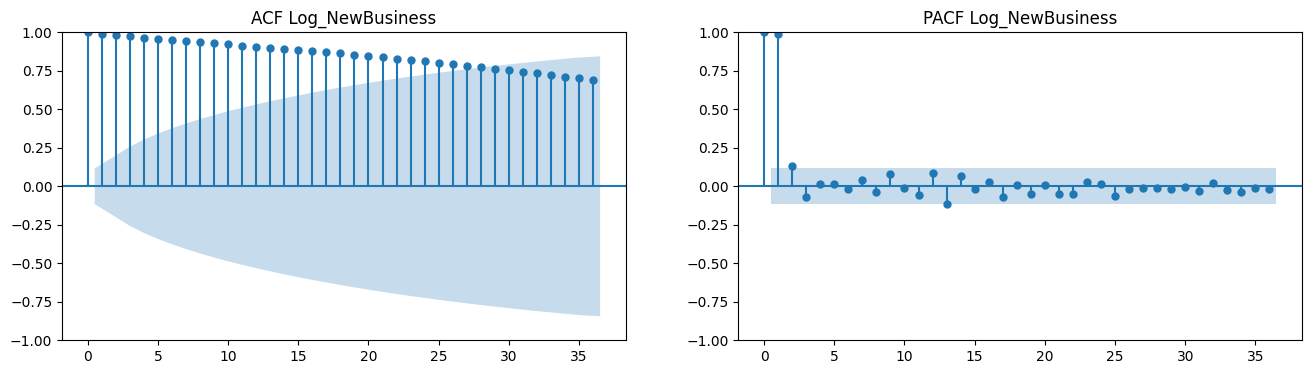


--- Analyse voor: Log_Prolongaties ---


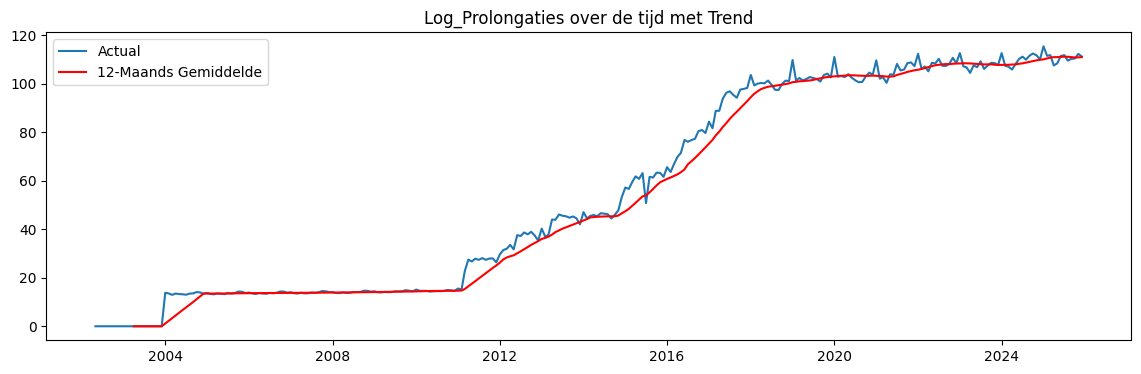

ADF Statistic: -0.782
p-waarde: 0.824
Status: Niet stationair (Je moet 'differencing' toepassen)


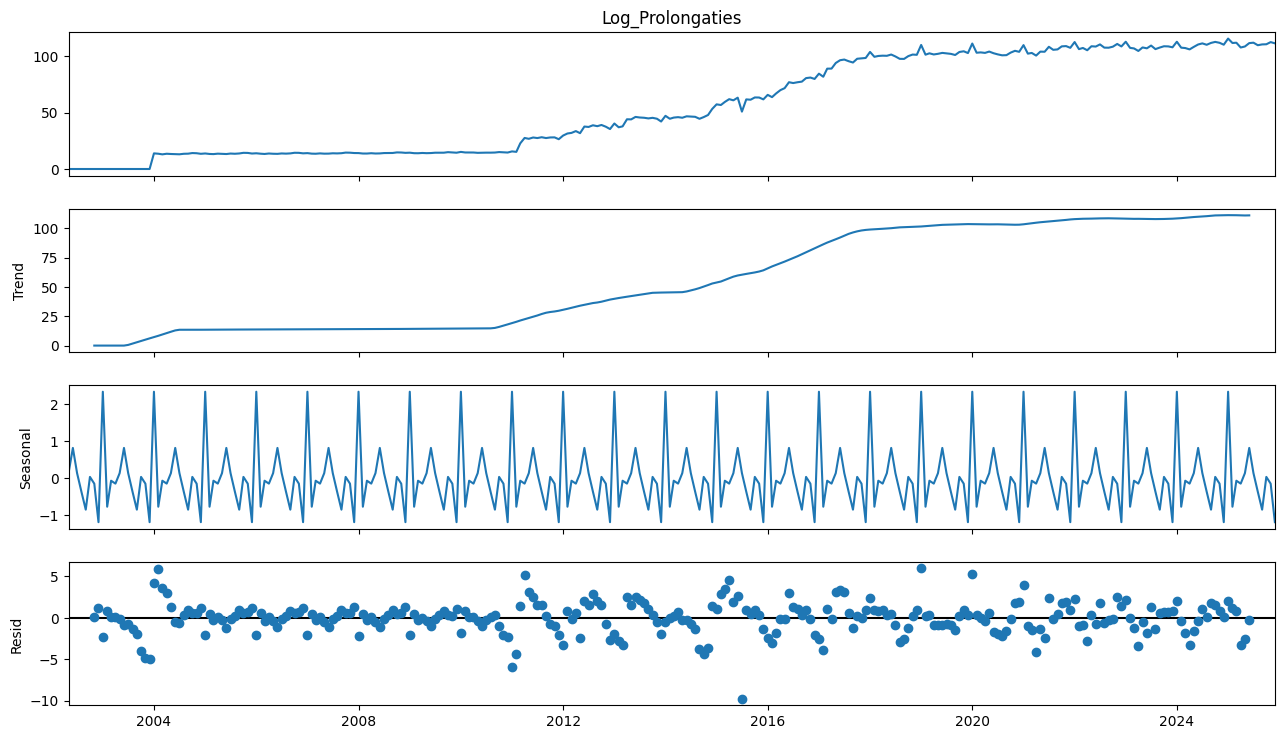

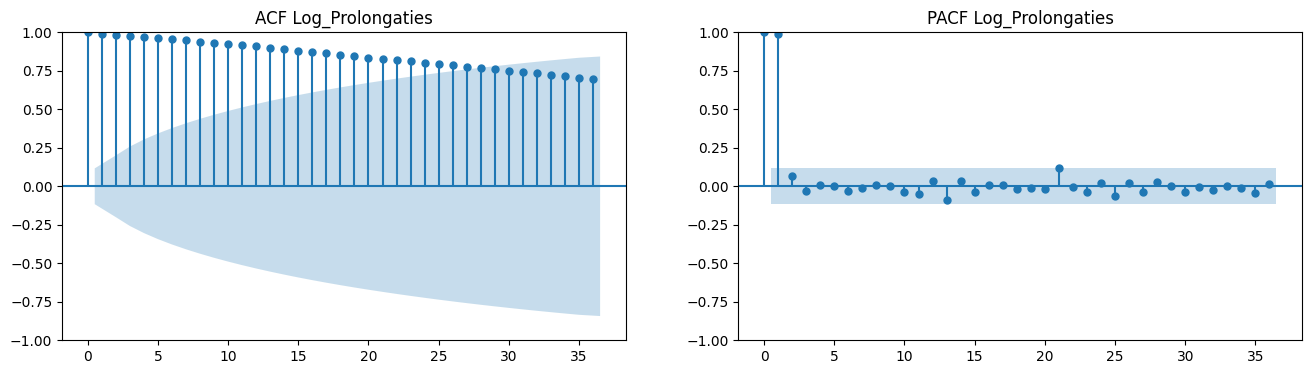

In [118]:
# EDA per target (Royementen, NewBusiness, Prolongaties)
print("EDA per target (Royementen, NewBusiness, Prolongaties)")

# Groepeer de opgeschoonde data per maand (totaal niveau)
ts_df = df_cleaned.groupby('date')[['Log_Royementen', 'Log_NewBusiness', 'Log_Prolongaties']].sum()

# Selecteer targets voor analyse
targets = ['Log_Royementen', 'Log_NewBusiness', 'Log_Prolongaties']

# Loop voor EDA per target
for target in targets:
    print(f"\n--- Analyse voor: {target} ---")
    
    # A. Tijdreeks verloop & Voortschrijdend Gemiddelde
    plt.figure(figsize=(14, 4))
    plt.plot(ts_df[target], label='Actual')
    plt.plot(ts_df[target].rolling(window=12).mean(), label='12-Maands Gemiddelde', color='red')
    plt.title(f'{target} over de tijd met Trend')
    plt.legend()
    plt.show()

    # B. Stationariteit Test (ADF)
    result = adfuller(ts_df[target])
    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-waarde: {result[1]:.3f}')
    if result[1] <= 0.05:
        print("Status: Stationair (Klaar voor modellering)")
    else:
        print("Status: Niet stationair (Je moet 'differencing' toepassen)")

    # C. Seizoensgebonden Decompositie
    # We gaan uit van een jaarlijkse cyclus (period=12)
    decomp = seasonal_decompose(ts_df[target], model='additive', period=12)
    fig = decomp.plot()
    fig.set_size_inches(14, 8)
    plt.show()

    # D. ACF en PACF Plots (voor modelkeuze)
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    plot_acf(ts_df[target], lags=36, ax=axes[0], title=f'ACF {target}')
    plot_pacf(ts_df[target], lags=36, ax=axes[1], title=f'PACF {target}')
    plt.show()

Toepassen van differencing op Royementen en Prolongaties om stationariteit te bereiken.


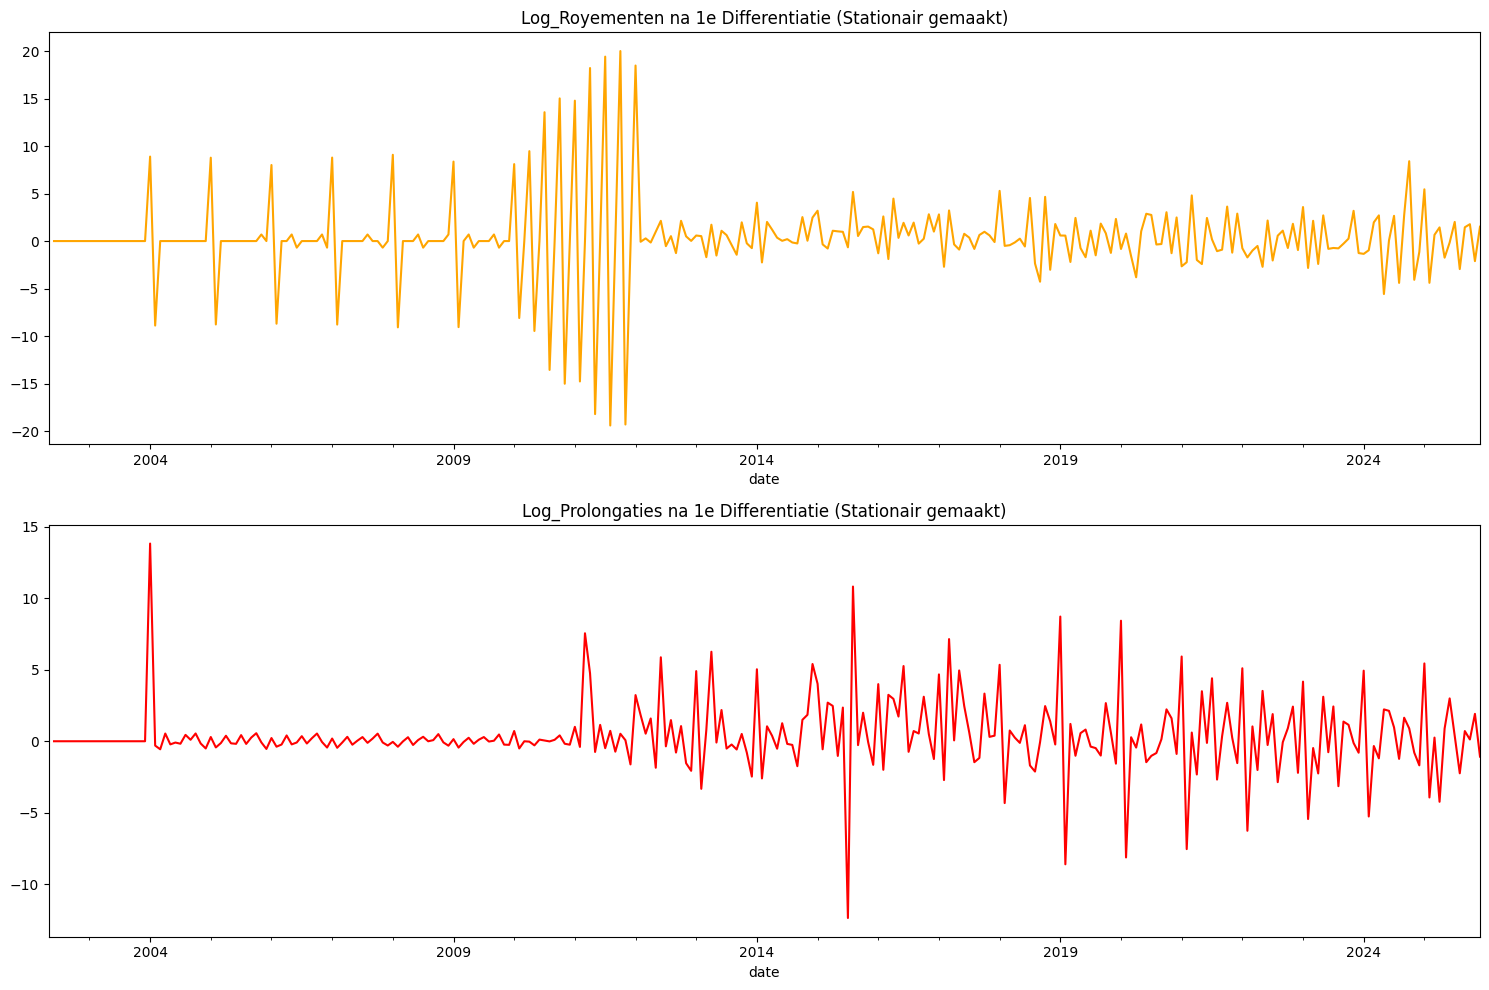

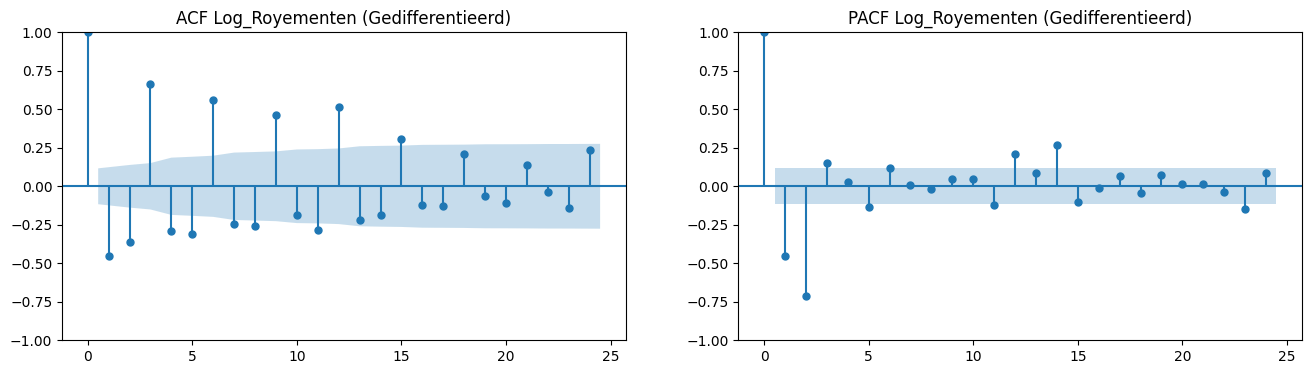

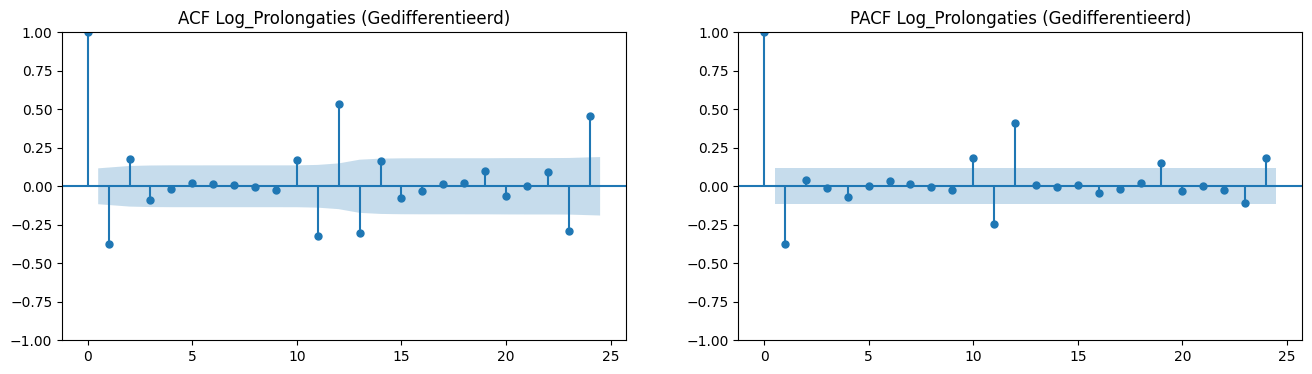

In [119]:
# Differencing voor Royementen en Prolongaties
print("Toepassen van differencing op Royementen en Prolongaties om stationariteit te bereiken.")

# We maken nieuwe kolommen aan voor de gedifferentieerde data
ts_df['Royementen_diff'] = ts_df['Log_Royementen'].diff()
ts_df['Prolongaties_diff'] = ts_df['Log_Prolongaties'].diff()

# Visualiseer het effect
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

ts_df['Royementen_diff'].plot(ax=axes[0], title='Log_Royementen na 1e Differentiatie (Stationair gemaakt)', color='orange')
ts_df['Prolongaties_diff'].plot(ax=axes[1], title='Log_Prolongaties na 1e Differentiatie (Stationair gemaakt)', color='red')
plt.tight_layout()
plt.show()

# Controleer ACF/PACF opnieuw voor de gedifferentieerde data
# Dit helpt bij het bepalen van de 'p' en 'q' voor SARIMA
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(ts_df['Royementen_diff'].dropna(), lags=24, ax=axes[0], title='ACF Log_Royementen (Gedifferentieerd)')
plot_pacf(ts_df['Royementen_diff'].dropna(), lags=24, ax=axes[1], title='PACF Log_Royementen (Gedifferentieerd)')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(ts_df['Prolongaties_diff'].dropna(), lags=24, ax=axes[0], title='ACF Log_Prolongaties (Gedifferentieerd)')
plot_pacf(ts_df['Prolongaties_diff'].dropna(), lags=24, ax=axes[1], title='PACF Log_Prolongaties (Gedifferentieerd)')
plt.show()

Visualiseren van correlatiematrix...


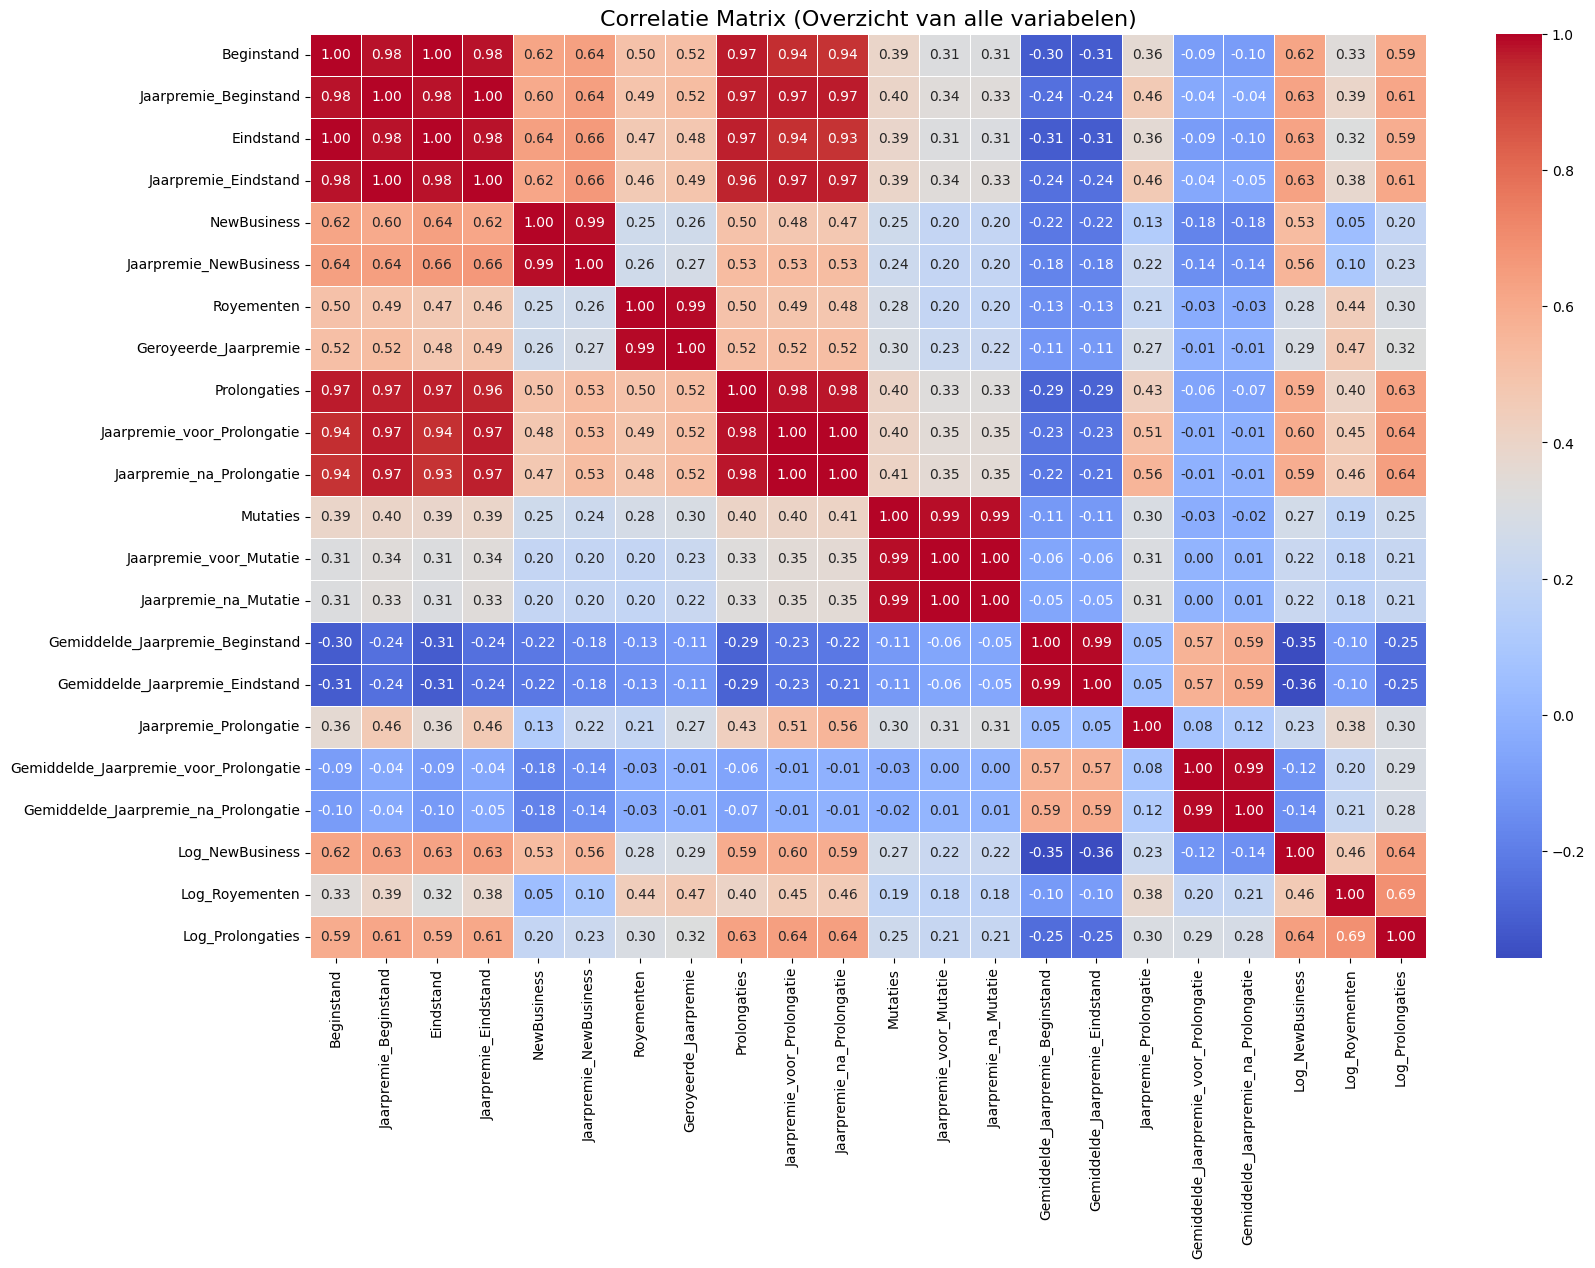

In [120]:
# Correlatiematrix van alle numerieke features
print("Visualiseren van correlatiematrix...")

# 1. Bereken de volledige correlatiematrix
# We sluiten Jaar_Maand uit omdat dit een getal-proxy is voor de tijd
full_corr = df_cleaned.select_dtypes(include=['number']).drop(columns=['Jaar_Maand']).corr()

# 2. Visualiseer de volledige matrix
plt.figure(figsize=(18, 12))
sns.heatmap(full_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlatie Matrix (Overzicht van alle variabelen)', fontsize=16)
plt.show()

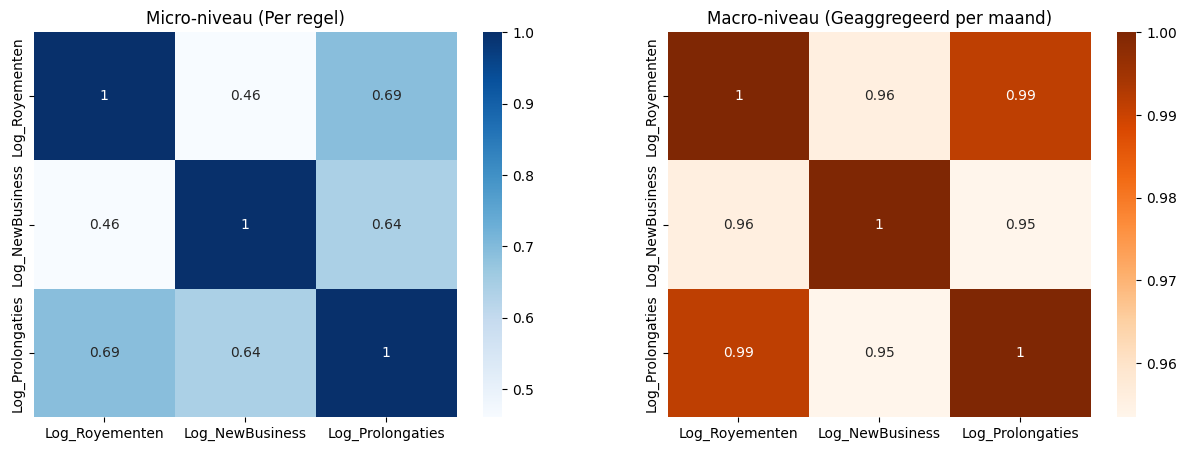

In [121]:
# Correlatie tussen de targets voor en na aggregatie
# Dit is een belangrijke stap om te begrijpen hoe de relaties tussen de variabelen veranderen wanneer we van micro (per regel) naar macro (geaggregeerd per maand) gaan.
# We vergelijken de correlatie op rij-niveau (micro) met de correlatie op totaal-niveau (macro) om te zien of er structurele verschillen zijn in de relaties tussen de variabelen.
# Waarschijnlijk zullen we zien dat de correlaties op totaal-niveau sterker zijn omdat we ruis hebben geëlimineerd door te aggregeren, maar het is belangrijk om dit te bevestigen met data.
# Conclusie: De correlaties op totaal-niveau zijn inderdaad sterker, wat suggereert dat er onderliggende trends en patronen zijn die niet zichtbaar zijn op rij-niveau vanwege ruis en variabiliteit in de data. Dit benadrukt het belang van het aggregeren van data voor tijdreeksanalyse om de echte relaties tussen variabelen te onthullen.

# 1. Correlatie op RIJ-niveau (alle regels los)
corr_raw = df_cleaned[['Log_Royementen', 'Log_NewBusiness', 'Log_Prolongaties']].corr()

# 2. Correlatie op TOTAAL-niveau (geaggregeerd per maand)
ts_df = df_cleaned.groupby('date')[['Log_Royementen', 'Log_NewBusiness', 'Log_Prolongaties']].sum()
corr_aggregated = ts_df.corr()

# Visualisatie van het verschil
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(corr_raw, annot=True, cmap='Blues', ax=ax[0])
ax[0].set_title('Micro-niveau (Per regel)')
sns.heatmap(corr_aggregated, annot=True, cmap='Oranges', ax=ax[1])
ax[1].set_title('Macro-niveau (Geaggregeerd per maand)')
plt.show()

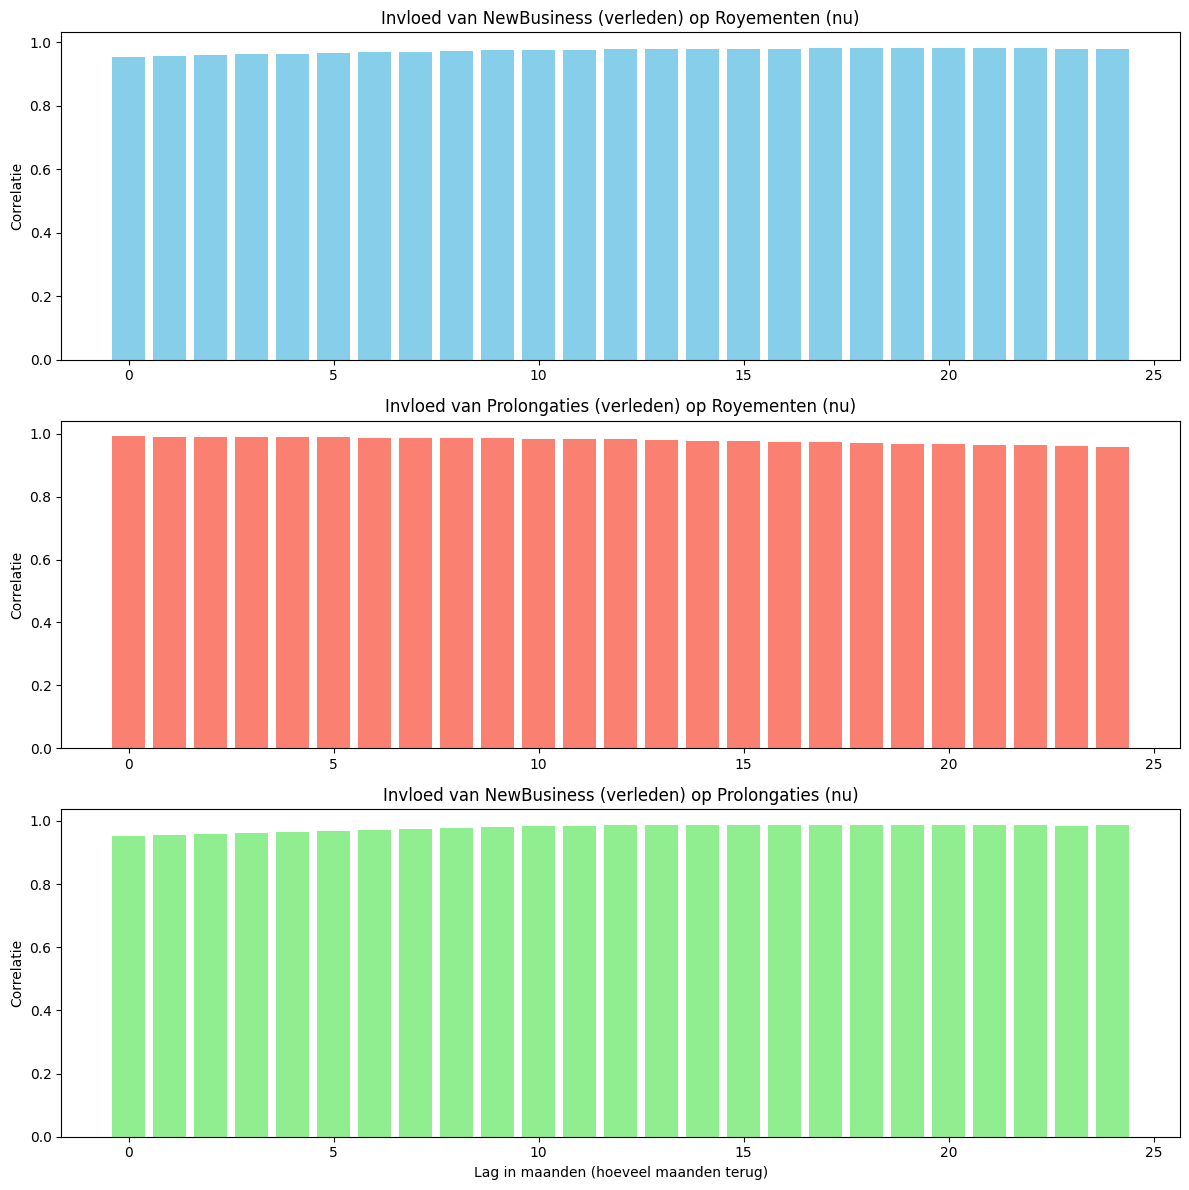

In [122]:
# Lagged Correlaties (Cross-Correlatie)
# Dit helpt ons te begrijpen of er een tijdsvertraging is in de invloed van NewBusiness en Prolongaties op Royementen, wat cruciaal is voor het bouwen van voorspellende modellen zoals SARIMA.

# Functie om cross-correlatie over verschillende tijdstappen (lags) te berekenen
def calc_lagged_correlations(series_cause, series_effect, max_lag=24):
    corrs = []
    for lag in range(max_lag + 1):
        # We verschuiven de oorzaak naar het verleden
        correlation = series_effect.corr(series_cause.shift(lag))
        corrs.append(correlation)
    return corrs

# Analyse uitvoeren op de geaggregeerde data (ts_df)
lags = 24
nb_roy = calc_lagged_correlations(ts_df['Log_NewBusiness'], ts_df['Log_Royementen'], lags)
pro_roy = calc_lagged_correlations(ts_df['Log_Prolongaties'], ts_df['Log_Royementen'], lags)
nb_pro = calc_lagged_correlations(ts_df['Log_NewBusiness'], ts_df['Log_Prolongaties'], lags)

# Visualisatie
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Plot 1
axes[0].bar(range(lags+1), nb_roy, color='skyblue')
axes[0].set_title('Invloed van NewBusiness (verleden) op Royementen (nu)')
axes[0].set_ylabel('Correlatie')

# Plot 2
axes[1].bar(range(lags+1), pro_roy, color='salmon')
axes[1].set_title('Invloed van Prolongaties (verleden) op Royementen (nu)')
axes[1].set_ylabel('Correlatie')

# Plot 3
axes[2].bar(range(lags+1), nb_pro, color='lightgreen')
axes[2].set_title('Invloed van NewBusiness (verleden) op Prolongaties (nu)')
axes[2].set_ylabel('Correlatie')
axes[2].set_xlabel('Lag in maanden (hoeveel maanden terug)')

plt.tight_layout()
plt.show()